In [20]:
#載入套件
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
#匯入資料（但所有變數名稱皆是隱藏，但需要預測最後TARGET CLASS是哪個）
#index_col=0代表設定第一行為index
df = pd.read_csv('data/Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [22]:
#由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大
#載入標準化比例尺(StandardScaler)套件，只將所有`特徵值`做標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])


In [23]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [24]:
#使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
#從k=1開始測試


In [25]:
#測試KNN演算法的好壞
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[138  16]
 [ 19 127]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       154
           1       0.89      0.87      0.88       146

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [27]:
#剛剛只先用了k=1來建立模型，現在利用for來建立迴圈(選擇不同k值)，並紀錄錯誤率
error_rate = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

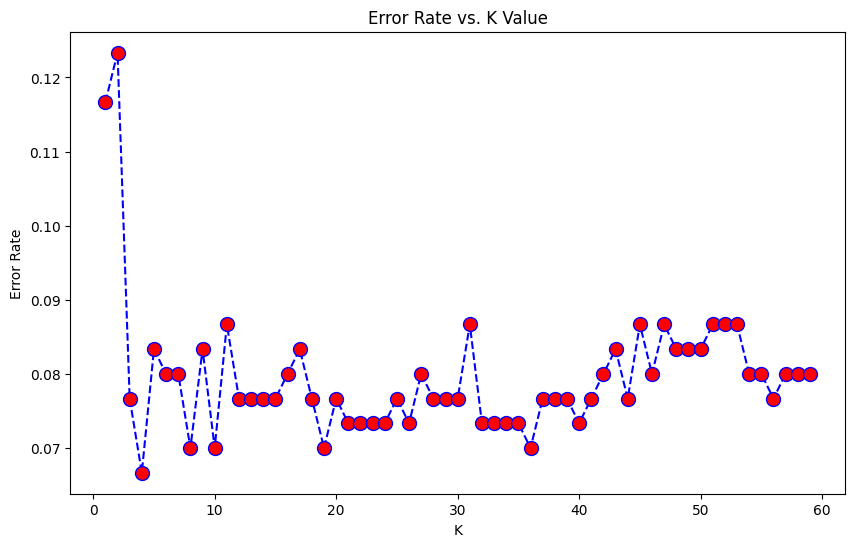

In [28]:
#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
#跟一開始k=1做比較
knn = KNeighborsClassifier(n_neighbors=1)
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [31]:
#選擇錯誤率最低的K=?????來看precision、recall、f1-score、support表現
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[141  13]
 [  9 137]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       154
           1       0.91      0.94      0.93       146

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

